# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0021'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 1
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


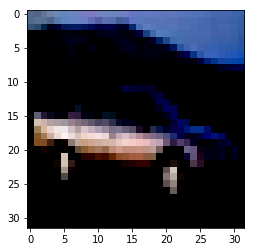

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGANGP(input_dim = (32,32,3)
        , critic_conv_filters = [64,64,128,128]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       204928    
__________

## training

In [11]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
    , n_critic = 5
    , clip_threshold = 0.01
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (9.4)] [D acc: (0.000)] [G loss: 0.0] [G acc: 0.023]
1 (5, 1) [D loss: (8.8)] [D acc: (0.000)] [G loss: -0.0] [G acc: 0.797]
2 (5, 1) [D loss: (7.9)] [D acc: (0.000)] [G loss: -0.6] [G acc: 0.961]
3 (5, 1) [D loss: (6.8)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.992]
4 (5, 1) [D loss: (5.8)] [D acc: (0.000)] [G loss: -3.7] [G acc: 1.000]
5 (5, 1) [D loss: (5.1)] [D acc: (0.000)] [G loss: -5.1] [G acc: 0.969]
6 (5, 1) [D loss: (5.0)] [D acc: (0.000)] [G loss: -5.1] [G acc: 1.000]
7 (5, 1) [D loss: (3.8)] [D acc: (0.000)] [G loss: -4.8] [G acc: 1.000]
8 (5, 1) [D loss: (2.6)] [D acc: (0.000)] [G loss: -3.5] [G acc: 1.000]
9 (5, 1) [D loss: (1.2)] [D acc: (0.000)] [G loss: -2.3] [G acc: 1.000]
10 (5, 1) [D loss: (-0.2)] [D acc: (0.000)] [G loss: -1.1] [G acc: 0.852]
11 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -0.7] [G acc: 0.586]
12 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -0.7] [G acc: 0.430]
13 (5, 1) [D loss: (-4.0)] [D acc: (0.000)] [G loss: -1.4] 

112 (5, 1) [D loss: (-3.0)] [D acc: (0.000)] [G loss: 4.4] [G acc: 0.023]
113 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: 7.5] [G acc: 0.031]
114 (5, 1) [D loss: (-2.9)] [D acc: (0.000)] [G loss: 5.2] [G acc: 0.000]
115 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: 5.3] [G acc: 0.000]
116 (5, 1) [D loss: (-3.7)] [D acc: (0.000)] [G loss: 0.1] [G acc: 0.500]
117 (5, 1) [D loss: (-4.2)] [D acc: (0.000)] [G loss: 11.6] [G acc: 0.016]
118 (5, 1) [D loss: (-3.2)] [D acc: (0.000)] [G loss: 5.9] [G acc: 0.008]
119 (5, 1) [D loss: (-3.0)] [D acc: (0.000)] [G loss: -0.4] [G acc: 0.555]
120 (5, 1) [D loss: (-3.6)] [D acc: (0.000)] [G loss: 8.5] [G acc: 0.047]
121 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: 2.7] [G acc: 0.164]
122 (5, 1) [D loss: (-3.2)] [D acc: (0.000)] [G loss: 9.0] [G acc: 0.000]
123 (5, 1) [D loss: (-3.1)] [D acc: (0.000)] [G loss: 7.7] [G acc: 0.000]
124 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: -1.6] [G acc: 0.750]
125 (5, 1) [D loss: (-2.9)] [D acc:

223 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 0.1] [G acc: 0.523]
224 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.5] [G acc: 1.000]
225 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -3.3] [G acc: 0.922]
226 (5, 1) [D loss: (-2.8)] [D acc: (0.000)] [G loss: -12.4] [G acc: 1.000]
227 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -0.1] [G acc: 0.516]
228 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -6.6] [G acc: 1.000]
229 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -2.7] [G acc: 1.000]
230 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -9.2] [G acc: 1.000]
231 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -0.5] [G acc: 0.672]
232 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -4.9] [G acc: 0.969]
233 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -9.0] [G acc: 0.992]
234 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -2.0] [G acc: 0.953]
235 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -8.3] [G acc: 1.000]
236 (5, 1) [D loss: (-2.5

332 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -2.7] [G acc: 0.914]
333 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -12.5] [G acc: 1.000]
334 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -12.8] [G acc: 1.000]
335 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -10.3] [G acc: 1.000]
336 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -8.8] [G acc: 0.984]
337 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -3.7] [G acc: 0.852]
338 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -15.2] [G acc: 1.000]
339 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -7.9] [G acc: 1.000]
340 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -19.3] [G acc: 1.000]
341 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -8.7] [G acc: 0.977]
342 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -6.8] [G acc: 1.000]
343 (5, 1) [D loss: (-3.3)] [D acc: (0.000)] [G loss: -9.3] [G acc: 0.945]
344 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -21.7] [G acc: 1.000]
345 (5, 1) [D loss:

441 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -26.0] [G acc: 1.000]
442 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -12.7] [G acc: 1.000]
443 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -18.6] [G acc: 1.000]
444 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -17.3] [G acc: 1.000]
445 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -14.3] [G acc: 1.000]
446 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -12.7] [G acc: 1.000]
447 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -21.6] [G acc: 1.000]
448 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -22.5] [G acc: 1.000]
449 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -10.3] [G acc: 1.000]
450 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -15.2] [G acc: 1.000]
451 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -15.0] [G acc: 1.000]
452 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -17.0] [G acc: 1.000]
453 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -21.0] [G acc: 1.000]
454 (5, 1) [

549 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -21.4] [G acc: 1.000]
550 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -23.0] [G acc: 1.000]
551 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -18.1] [G acc: 1.000]
552 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -25.2] [G acc: 1.000]
553 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -22.7] [G acc: 1.000]
554 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -21.7] [G acc: 1.000]
555 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -18.7] [G acc: 1.000]
556 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -26.9] [G acc: 1.000]
557 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -24.1] [G acc: 1.000]
558 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -16.1] [G acc: 1.000]
559 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -23.1] [G acc: 1.000]
560 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -22.7] [G acc: 1.000]
561 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -19.9] [G acc: 1.000]
562 (5, 1) [

657 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -26.3] [G acc: 1.000]
658 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -25.9] [G acc: 1.000]
659 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -24.3] [G acc: 1.000]
660 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -27.5] [G acc: 1.000]
661 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -22.2] [G acc: 1.000]
662 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -22.2] [G acc: 1.000]
663 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -25.5] [G acc: 1.000]
664 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -33.8] [G acc: 1.000]
665 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -21.3] [G acc: 1.000]
666 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -23.3] [G acc: 1.000]
667 (5, 1) [D loss: (-1.2)] [D acc: (0.000)] [G loss: -30.3] [G acc: 1.000]
668 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -20.7] [G acc: 1.000]
669 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -20.9] [G acc: 1.000]
670 (5, 1) [

765 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -26.1] [G acc: 1.000]
766 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -20.7] [G acc: 1.000]
767 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -32.8] [G acc: 1.000]
768 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -24.4] [G acc: 1.000]
769 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -23.4] [G acc: 1.000]
770 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -20.7] [G acc: 1.000]
771 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -29.0] [G acc: 1.000]
772 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -27.2] [G acc: 1.000]
773 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -21.8] [G acc: 1.000]
774 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -30.3] [G acc: 1.000]
775 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -20.7] [G acc: 1.000]
776 (5, 1) [D loss: (-2.8)] [D acc: (0.000)] [G loss: -27.4] [G acc: 1.000]
777 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -24.1] [G acc: 1.000]
778 (5, 1) [

873 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -26.3] [G acc: 1.000]
874 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -28.3] [G acc: 1.000]
875 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -23.2] [G acc: 1.000]
876 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -21.1] [G acc: 1.000]
877 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -28.4] [G acc: 1.000]
878 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -21.0] [G acc: 1.000]
879 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -29.1] [G acc: 1.000]
880 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -24.0] [G acc: 1.000]
881 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -18.3] [G acc: 1.000]
882 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -23.6] [G acc: 1.000]
883 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -24.9] [G acc: 1.000]
884 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -24.2] [G acc: 1.000]
885 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -19.6] [G acc: 1.000]
886 (5, 1) [

981 (5, 1) [D loss: (-3.0)] [D acc: (0.000)] [G loss: -11.4] [G acc: 1.000]
982 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -22.0] [G acc: 1.000]
983 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -20.0] [G acc: 1.000]
984 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -18.4] [G acc: 1.000]
985 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -26.0] [G acc: 1.000]
986 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -17.8] [G acc: 1.000]
987 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -22.1] [G acc: 1.000]
988 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -24.0] [G acc: 1.000]
989 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -21.2] [G acc: 1.000]
990 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -24.7] [G acc: 1.000]
991 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -19.9] [G acc: 1.000]
992 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -20.7] [G acc: 1.000]
993 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -22.1] [G acc: 1.000]
994 (5, 1) [

1088 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -17.3] [G acc: 1.000]
1089 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -14.5] [G acc: 1.000]
1090 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -26.9] [G acc: 1.000]
1091 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -19.8] [G acc: 1.000]
1092 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -13.1] [G acc: 1.000]
1093 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -24.1] [G acc: 1.000]
1094 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -12.9] [G acc: 1.000]
1095 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -16.5] [G acc: 1.000]
1096 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -22.2] [G acc: 1.000]
1097 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -20.2] [G acc: 1.000]
1098 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -14.1] [G acc: 1.000]
1099 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -18.2] [G acc: 1.000]
1100 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -17.3] [G acc: 1.000]

1195 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -22.5] [G acc: 1.000]
1196 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -15.5] [G acc: 1.000]
1197 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -14.6] [G acc: 1.000]
1198 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -17.7] [G acc: 1.000]
1199 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -15.8] [G acc: 1.000]
1200 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -15.8] [G acc: 1.000]
1201 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -21.6] [G acc: 1.000]
1202 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -16.1] [G acc: 1.000]
1203 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -16.8] [G acc: 1.000]
1204 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -18.0] [G acc: 1.000]
1205 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -19.8] [G acc: 1.000]
1206 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -16.8] [G acc: 1.000]
1207 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -18.7] [G acc: 1.000]

1302 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -13.6] [G acc: 1.000]
1303 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -16.6] [G acc: 1.000]
1304 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -18.6] [G acc: 1.000]
1305 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -10.8] [G acc: 1.000]
1306 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -21.5] [G acc: 1.000]
1307 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -22.4] [G acc: 1.000]
1308 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -10.7] [G acc: 1.000]
1309 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -13.6] [G acc: 1.000]
1310 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -14.1] [G acc: 1.000]
1311 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -20.0] [G acc: 1.000]
1312 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -21.7] [G acc: 1.000]
1313 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -15.7] [G acc: 1.000]
1314 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -14.1] [G acc: 1.000]

1409 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -15.9] [G acc: 1.000]
1410 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -18.1] [G acc: 1.000]
1411 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -17.3] [G acc: 1.000]
1412 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -12.7] [G acc: 1.000]
1413 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -19.7] [G acc: 1.000]
1414 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -13.0] [G acc: 1.000]
1415 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -14.6] [G acc: 1.000]
1416 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -15.1] [G acc: 1.000]
1417 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -20.2] [G acc: 1.000]
1418 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -11.6] [G acc: 1.000]
1419 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -15.3] [G acc: 1.000]
1420 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -13.2] [G acc: 1.000]
1421 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -13.9] [G acc: 1.000]

1516 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -12.4] [G acc: 1.000]
1517 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -15.6] [G acc: 1.000]
1518 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -11.0] [G acc: 1.000]
1519 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -18.9] [G acc: 1.000]
1520 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -17.4] [G acc: 1.000]
1521 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -8.9] [G acc: 1.000]
1522 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -13.3] [G acc: 1.000]
1523 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -18.3] [G acc: 1.000]
1524 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -10.5] [G acc: 1.000]
1525 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -16.0] [G acc: 1.000]
1526 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -12.4] [G acc: 1.000]
1527 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -12.6] [G acc: 1.000]
1528 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -7.4] [G acc: 0.984]
1

1623 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -16.2] [G acc: 1.000]
1624 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -16.3] [G acc: 1.000]
1625 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -10.3] [G acc: 1.000]
1626 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -16.9] [G acc: 1.000]
1627 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -8.3] [G acc: 1.000]
1628 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -20.8] [G acc: 1.000]
1629 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -14.4] [G acc: 1.000]
1630 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -8.9] [G acc: 1.000]
1631 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -14.4] [G acc: 1.000]
1632 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -16.8] [G acc: 1.000]
1633 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -6.3] [G acc: 0.992]
1634 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -18.5] [G acc: 1.000]
1635 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -15.6] [G acc: 1.000]
16

1730 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -20.0] [G acc: 1.000]
1731 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -8.6] [G acc: 1.000]
1732 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -10.1] [G acc: 1.000]
1733 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -17.0] [G acc: 1.000]
1734 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -8.2] [G acc: 1.000]
1735 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -18.6] [G acc: 1.000]
1736 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -10.6] [G acc: 1.000]
1737 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -15.1] [G acc: 1.000]
1738 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -9.4] [G acc: 1.000]
1739 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -12.7] [G acc: 1.000]
1740 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -11.8] [G acc: 1.000]
1741 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -14.9] [G acc: 1.000]
1742 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -14.5] [G acc: 1.000]
17

1837 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -14.7] [G acc: 1.000]
1838 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -12.9] [G acc: 1.000]
1839 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -10.6] [G acc: 1.000]
1840 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -17.4] [G acc: 1.000]
1841 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -14.8] [G acc: 1.000]
1842 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -12.5] [G acc: 1.000]
1843 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -16.3] [G acc: 1.000]
1844 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -10.7] [G acc: 1.000]
1845 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -10.7] [G acc: 0.992]
1846 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -19.0] [G acc: 1.000]
1847 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -13.9] [G acc: 1.000]
1848 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -6.5] [G acc: 1.000]
1849 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -10.8] [G acc: 1.000]


1944 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -14.0] [G acc: 1.000]
1945 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -15.2] [G acc: 1.000]
1946 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -11.4] [G acc: 1.000]
1947 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -5.5] [G acc: 0.953]
1948 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -18.4] [G acc: 1.000]
1949 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -14.9] [G acc: 1.000]
1950 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -12.7] [G acc: 1.000]
1951 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -12.3] [G acc: 1.000]
1952 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -17.1] [G acc: 1.000]
1953 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -17.2] [G acc: 1.000]
1954 (5, 1) [D loss: (-2.8)] [D acc: (0.000)] [G loss: -13.0] [G acc: 1.000]
1955 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -10.8] [G acc: 1.000]
1956 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -13.1] [G acc: 1.000]


In [12]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
gan.discriminator.predict(np.array([x_train[idx]]))

AttributeError: 'WGANGP' object has no attribute 'discriminator'

In [ ]:
noise = np.random.normal(0, 1, (1, gan.z_dim))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.predict(np.array([gen_imgs[0]]))

In [ ]:
gan.train_discriminator(x_train, batch_size = 32, clip_threshold = 0.01)

In [ ]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.train_on_batch(gen_imgs, fake)

In [ ]:
[(np.min(x), np.max(x)) for x in gan.discriminator.get_weights()]

In [ ]:
gan.train_generator(batch_size = 128)

In [ ]:
[np.round((np.min(x), np.max(x)), 4) for x in gan.generator.get_weights()]

In [ ]:
plt.imshow(np.clip((x[200]+1)*0.5,0,1))

In [ ]:
gan.discriminator.predict(x)

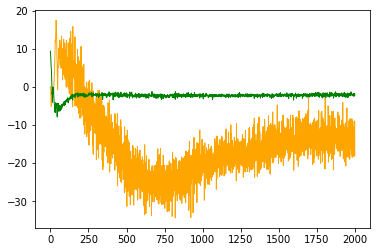

In [18]:
plt.plot(g_losses, color='orange', linewidth=1)
plt.plot([x[0] for x in d_losses], color='green', linewidth=1)


In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(np.clip((img+1)*0.5,0,1))

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.generator.get_weights()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [13]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))